# Project, Lin. Alg. for Data Science.
# Due date: Wed. 20 April, 2022.

# Please fill in here:
- Your name: Matthew Peck
- Shared notebook url: https://drive.google.com/file/d/13_7t9dTnrZnq9FPfQbszRqpdOhnnst1o/view?usp=sharing


In [ ]:
import pandas as pd #to work with data frames aka the holy grail
import numpy as np #useful library to help us manipulate data frames 
import json #read and write json files 
import requests #make spotify api call requests
from pandas.io.json import json_normalize
from io import StringIO
from urllib.parse import urlencode
import base64
import matplotlib.pyplot as plt



In [ ]:
#Resources
#https://colab.research.google.com/drive/1RjxURDlUTgR-ZhIMfu47jsK2mC3KB4R3?usp=sharing#scrollTo=wjvICz500TOE
#https://colab.research.google.com/drive/1bjnEi_C9tb1YUIQ-IkqvM6IL-_DhjEzE#scrollTo=fobJde6TiWei
#Juypter Notebook which is what my code and data was written

In [ ]:
#reading streaming data into data frames 
df_stream0 = pd.read_json("StreamingHistory0.json")

In [ ]:
df_stream1 = pd.read_json("StreamingHistory1.json")

In [ ]:
df_stream2 = pd.read_json("StreamingHistory2.json")

In [ ]:
df_stream = pd.concat([df_stream0, df_stream1, df_stream2])


In [ ]:
#what does our streaming history data frame tell us 
df_stream.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-02 01:30,Triathalon,Hard to Move,333045
1,2021-03-02 01:32,Crumb,Cracking,111986
2,2021-03-02 01:36,Crumb,Nina,200280
3,2021-03-02 01:38,Crumb,Ghostride,126120
4,2021-03-02 01:41,Crumb,Fall Down,173000


In [ ]:
#lets add a uniqueID for each row
df_stream['UniqueID'] = df_stream['artistName'] + ":" + df_stream['trackName']

In [ ]:
df_stream.head()
#yea... I was a huge fan of crumb it seems lol 


,endTime,artistName,trackName,msPlayed,UniqueID
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,Triathalon:Hard to Move
1,2021-03-02 01:32,Crumb,Cracking,111986,Crumb:Cracking
2,2021-03-02 01:36,Crumb,Nina,200280,Crumb:Nina
3,2021-03-02 01:38,Crumb,Ghostride,126120,Crumb:Ghostride
4,2021-03-02 01:41,Crumb,Fall Down,173000,Crumb:Fall Down


# isolate the "tracks" dictionary from the library file and save it as a new file 


In [ ]:
#open the library json file and save it
with open("YourLibrary.json", "r",encoding="utf8") as read_file:
    lib = json.load(read_file)
    
#this a dictionary
type(lib)

dict

In [ ]:
#lets see what it is in it
lib.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'artists', 'bannedArtists', 'other'])

In [ ]:
#we only care about the tracks for this workshop we will isolate this
tracks = lib['tracks']
#this returns a list 
print(tracks[0])
#help(requests)

{'artist': 'Frank Ocean', 'album': 'Blonde', 'track': 'Futura Free', 'uri': 'spotify:track:5k8LB57xOq8UUNVaKWSqrf'}


In [ ]:
#Accessing the Spotify API
# save your IDs from new project in Spotify Developer Dashboard
CLIENT_ID = '54fea533c6314e99bf718911b800f564'
CLIENT_SECRET = "27b01cb9cc0a47f9b4ada883841eab6e"

In [ ]:
# generate access token

# authentication URL
AUTH_URL = 'https://accounts.spotify.com/api/token'

#help(requests.post)

In [ ]:
# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})



In [ ]:
auth_response_data = auth_response.json()

In [ ]:
auth_response_data.keys()

dict_keys(['access_token', 'token_type', 'expires_in'])

In [ ]:
access_token = auth_response_data['access_token']
print(auth_response.json())

{'access_token': 'BQCU9GVgxjLW7CNDK5uYDc4Y-MP1UUYAoYF63eotkToVFVXJpe60dawCdFRFym5DrUoXnH__lHWuQQZCsCQ', 'token_type': 'Bearer', 'expires_in': 3600}


In [ ]:
# used for authenticating all API calls
headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}
BASE_URL = 'https://api.spotify.com/v1/'


In [ ]:
print(type(tracks[0]))
#each index in the list is a dictionary
print(tracks[0])

<class 'dict'>
{'artist': 'Frank Ocean', 'album': 'Blonde', 'track': 'Futura Free', 'uri': 'spotify:track:5k8LB57xOq8UUNVaKWSqrf'}


In [ ]:
track = tracks[0]
uri = track['uri']
uri
type(uri)

str

In [ ]:
uri = uri.split(":")

In [ ]:
t_uri = uri[2]

In [ ]:
r = requests.get(BASE_URL + 'tracks/' + t_uri, headers=headers)
type(r)

requests.models.Response

In [ ]:
r = r.json()
type(r)

dict

In [ ]:
r.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [ ]:
artist_uri = r['artists'][0]['uri']

In [ ]:
artist_uri = artist_uri.split(":")

In [ ]:
a_uri = artist_uri[2]

In [ ]:
s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)


In [ ]:
s = s.json()

In [ ]:
s.keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [ ]:
s['genres']

['alternative r&b', 'hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']

In [ ]:
df_library = pd.DataFrame(tracks)

In [ ]:
df_library.head()

,artist,album,track,uri
0,Frank Ocean,Blonde,Futura Free,spotify:track:5k8LB57xOq8UUNVaKWSqrf
1,TV Girl,Who Really Cares,Taking What's Not Yours,spotify:track:2MDV2w1rdUPT4Qxm5L2Wzv
2,Guided By Voices,Sunfish Holy Breakfast,If We Wait,spotify:track:3nX5TiovePqS6yG8pYdwR2
3,A$AP Ferg,Floor Seats,Floor Seats,spotify:track:6AomCkEOQUODCYzQwH4SWC
4,Drake,Scary Hours 2,What’s Next,spotify:track:3aQem4jVGdhtg116TmJnHz


# We downloaded the library file as a dictionary
# 2. the Dictionary had keys that represent each album, track, and uri in the dictionary
# 3. We are only concerned with the tracks in our library so we get this key and its value from the dictionary
# 4 when we do we get a list and each index is a dictionary 


In [ ]:
df_library.columns
#we've now created an dataframe where we have each song in our library and the artist, album, track, and uri that corresponds

Index(['artist', 'album', 'track', 'uri'], dtype='object')

In [ ]:
# we need to create a unique idea for each song. this will come in handy later
df_library['UniqueID'] = df_library['artist'] + ":" + df_library['track']
#we need the uris for each track. this will also come in handy later.
df_library.loc[:,"uri"]
#notice that the uri is the alphanumerical sequence after the second colon in each row. we need to strip this 


0      spotify:track:5k8LB57xOq8UUNVaKWSqrf
1      spotify:track:2MDV2w1rdUPT4Qxm5L2Wzv
2      spotify:track:3nX5TiovePqS6yG8pYdwR2
3      spotify:track:6AomCkEOQUODCYzQwH4SWC
4      spotify:track:3aQem4jVGdhtg116TmJnHz
                       ...                 
247    spotify:track:0SVvyfRMFMRJzc0L2odX20
248    spotify:track:1Pr2b8WV0rFkSAjrnzUeDc
249    spotify:track:3WkibOpDF7cQ5xntM1epyf
250    spotify:track:3wwo0bJvDSorOpNfzEkfXx
251    spotify:track:1p2TWJxUlHE5JR0sE6E1d7
Name: uri, Length: 252, dtype: object

In [ ]:
# add column with track URI stripped of 'spotify:track:'
new = df_library["uri"].str.split(":", expand = True)
new


,0,1,2
0,spotify,track,5k8LB57xOq8UUNVaKWSqrf
1,spotify,track,2MDV2w1rdUPT4Qxm5L2Wzv
2,spotify,track,3nX5TiovePqS6yG8pYdwR2
3,spotify,track,6AomCkEOQUODCYzQwH4SWC
4,spotify,track,3aQem4jVGdhtg116TmJnHz
...,...,...,...
247,spotify,track,0SVvyfRMFMRJzc0L2odX20
248,spotify,track,1Pr2b8WV0rFkSAjrnzUeDc
249,spotify,track,3WkibOpDF7cQ5xntM1epyf
250,spotify,track,3wwo0bJvDSorOpNfzEkfXx


In [ ]:
df_library['track_uri'] = new[2]

In [ ]:
df_library.head()
#we now have the trip uri 

,artist,album,track,uri,UniqueID,track_uri
0,Frank Ocean,Blonde,Futura Free,spotify:track:5k8LB57xOq8UUNVaKWSqrf,Frank Ocean:Futura Free,5k8LB57xOq8UUNVaKWSqrf
1,TV Girl,Who Really Cares,Taking What's Not Yours,spotify:track:2MDV2w1rdUPT4Qxm5L2Wzv,TV Girl:Taking What's Not Yours,2MDV2w1rdUPT4Qxm5L2Wzv
2,Guided By Voices,Sunfish Holy Breakfast,If We Wait,spotify:track:3nX5TiovePqS6yG8pYdwR2,Guided By Voices:If We Wait,3nX5TiovePqS6yG8pYdwR2
3,A$AP Ferg,Floor Seats,Floor Seats,spotify:track:6AomCkEOQUODCYzQwH4SWC,A$AP Ferg:Floor Seats,6AomCkEOQUODCYzQwH4SWC
4,Drake,Scary Hours 2,What’s Next,spotify:track:3aQem4jVGdhtg116TmJnHz,Drake:What’s Next,3aQem4jVGdhtg116TmJnHz


In [ ]:
#lets create a data frame that will be used for visualization in tableau
df_tableau = df_stream.copy()



In [ ]:
df_tableau.head()

,endTime,artistName,trackName,msPlayed,UniqueID
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,Triathalon:Hard to Move
1,2021-03-02 01:32,Crumb,Cracking,111986,Crumb:Cracking
2,2021-03-02 01:36,Crumb,Nina,200280,Crumb:Nina
3,2021-03-02 01:38,Crumb,Ghostride,126120,Crumb:Ghostride
4,2021-03-02 01:41,Crumb,Fall Down,173000,Crumb:Fall Down


In [ ]:
df_tableau['msPlayed']

0       333045
1       111986
2       200280
3       126120
4       173000
         ...  
3372     58280
3373    204401
3374    265480
3375    184516
3376    249667
Name: msPlayed, Length: 23377, dtype: int64

In [ ]:
#df_tableau['msPlayed']
myEndTime = df_tableau['endTime'].str.split(" ", expand = True)
#myEndTime

In [ ]:
#convert the time to be calculated in minutes
#also needs to be converted frmo string to int

myHrsMin = myEndTime[1].str.split(":", expand = True)
#myHrsMin
myHrsMin[2] = myHrsMin[0]
myHrsMin[3] = myHrsMin[1]

# converting all columns to int type
myHrsMin[2] = myHrsMin[2].astype(int)
myHrsMin[3] = myHrsMin[3].astype(int)
myHrsMin[2] = myHrsMin[2].mul(60)

myHrsMin[4] = myHrsMin[2]
myHrsMin[4] = myHrsMin[4].add(myHrsMin[3])
#myHrsMin[5] = myHrsMin[4].astype(str) (Col 4 (Time in Minutes) as a string)

print(myHrsMin.dtypes)
myHrsMin

#Convert back using this 
myHrsMin[5] = myHrsMin[4].floordiv(60)
myHrsMin[6] = myHrsMin[4].mod(60)
print(myHrsMin.dtypes)
myHrsMin

0    object
1    object
2     int32
3     int32
4     int32
dtype: object
0    object
1    object
2     int32
3     int32
4     int32
5     int32
6     int32
dtype: object


,0,1,2,3,4,5,6
0,01,30,60,30,90,1,30
1,01,32,60,32,92,1,32
2,01,36,60,36,96,1,36
3,01,38,60,38,98,1,38
4,01,41,60,41,101,1,41
...,...,...,...,...,...,...,...
3372,20,18,1200,18,1218,20,18
3373,23,09,1380,9,1389,23,9
3374,23,14,1380,14,1394,23,14
3375,23,17,1380,17,1397,23,17


In [ ]:
df_tableau['TimeOfDay'] = myHrsMin[4]
#df_stream
#df_library
#df_tableau #going to use from now on

In [ ]:
df_tableau[['endTime','msPlayed','TimeOfDay','artistName','trackName','UniqueID']]
df_tableau = df_tableau.reindex(columns=['endTime','artistName','trackName','msPlayed','TimeOfDay','UniqueID'])
df_tableau.head()

,endTime,artistName,trackName,msPlayed,TimeOfDay,UniqueID
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,90,Triathalon:Hard to Move
1,2021-03-02 01:32,Crumb,Cracking,111986,92,Crumb:Cracking
2,2021-03-02 01:36,Crumb,Nina,200280,96,Crumb:Nina
3,2021-03-02 01:38,Crumb,Ghostride,126120,98,Crumb:Ghostride
4,2021-03-02 01:41,Crumb,Fall Down,173000,101,Crumb:Fall Down


In [ ]:
df_library['track_uri'] = new[2]

In [ ]:
# we now want to merge our streaming data DataFrame and our Library data frame 
df_tableau = pd.merge(df_tableau, df_library[['album','UniqueID','track_uri']],how='left',on=['UniqueID'])
# we left join with df_library on UniqueID to bring in album and track_uri

df_tableau[['endTime','msPlayed','TimeOfDay','artistName','trackName','UniqueID','album','track_uri']]
df_tableau.head()

,endTime,artistName,trackName,msPlayed,TimeOfDay,UniqueID,album,track_uri
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,90,Triathalon:Hard to Move,NaN,NaN
1,2021-03-02 01:32,Crumb,Cracking,111986,92,Crumb:Cracking,NaN,NaN
2,2021-03-02 01:36,Crumb,Nina,200280,96,Crumb:Nina,NaN,NaN
3,2021-03-02 01:38,Crumb,Ghostride,126120,98,Crumb:Ghostride,NaN,NaN
4,2021-03-02 01:41,Crumb,Fall Down,173000,101,Crumb:Fall Down,NaN,NaN


In [ ]:
# create blank dictionary to store track URI, artist URI, and genres
dict_genre = {}

# convert track_uri column to an iterable list
track_uris = df_library['track_uri'].to_list()


In [ ]:
# loop through track URIs and pull artist URI using the API,
# then use artist URI to pull genres associated with that artist
# store all these in a dictionary
for t_uri in track_uris:
    #the key of the dictionary will be the track_uri and the values for each key will be the artist uri and a list of genres
    dict_genre[t_uri] = {'artist_uri': "", "genres":[]}
    
    #request to get the track information based on the spotify endpoint and the track_uri
    r = requests.get(BASE_URL + 'tracks/' + t_uri, headers=headers)
    #turn into json format to access important information 
    r = r.json()
    #get the artist uri from the json file 
    a_uri = r['artists'][0]['uri'].split(':')[2]
    #place the artist uri for the corresponding track uri in the dictionary 
    dict_genre[t_uri]['artist_uri'] = a_uri
    #now use the artist uri to get the genres
    
    s = requests.get(BASE_URL + 'artists/' + a_uri, headers=headers)
    #turn into json format to access important information 
    s = s.json()
    #put the corresponding genres in the dictionary for th
    dict_genre[t_uri]['genres'] = s['genres']

#dict_genre

In [ ]:
#convert the dictionary to a Data Frame 
df_genre = pd.DataFrame.from_dict(dict_genre, orient='index')
#df_genre.head()


In [ ]:
#make the first column be the track uri
df_genre.insert(0, 'track_uri', df_genre.index)
#df_genre.head()


In [ ]:
df_genre.reset_index(inplace=True, drop=True)
print(len(df_genre))
#df_genre.head()
#df_genre
#expanding the genres for each index and track uri 
df_genre_expanded = df_genre.explode('genres')
df_genre_expanded.head()

252


,track_uri,artist_uri,genres
0,5k8LB57xOq8UUNVaKWSqrf,2h93pZq0e7k5yf4dywlkpM,alternative r&b
0,5k8LB57xOq8UUNVaKWSqrf,2h93pZq0e7k5yf4dywlkpM,hip hop
0,5k8LB57xOq8UUNVaKWSqrf,2h93pZq0e7k5yf4dywlkpM,lgbtq+ hip hop
0,5k8LB57xOq8UUNVaKWSqrf,2h93pZq0e7k5yf4dywlkpM,neo soul
0,5k8LB57xOq8UUNVaKWSqrf,2h93pZq0e7k5yf4dywlkpM,pop


In [ ]:
df_genre["genres"]

0      [alternative r&b, hip hop, lgbtq+ hip hop, neo...
1                                            [indie pop]
2      [alternative pop, alternative rock, anti-folk,...
3      [gangster rap, hip hop, pop rap, rap, southern...
4      [canadian hip hop, canadian pop, hip hop, rap,...
                             ...                        
247                       [alternative rock, indie rock]
248    [alternative pop, alternative rock, britpop, d...
249                             [pop rap, reggae fusion]
250                           [chicago rap, melodic rap]
251    [alternative r&b, art pop, chillwave, electrop...
Name: genres, Length: 252, dtype: object

In [ ]:
#convert data frame to csv file
df_genre.to_csv('GenreTable.csv')
df_tableau.to_csv('MySpotifyDataTable.csv')
df_genre_expanded.to_csv('GenresExpandedTable.csv')

print('done')

done


In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
# creating a copy of the dataset
#df_cluster = df.copy()
#df_cluster = df_cluster.iloc[:300]
#df_cluster.to_csv('df_brasil.csv', index=0)

In [ ]:
X = pd.DataFrame(df_tableau.iloc[:, [3,4]].values)
df_tableau.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed', 'TimeOfDay',
       'UniqueID', 'album', 'track_uri'],
      dtype='object')

In [ ]:
cols = df_tableau.iloc[:, [3,4]].columns
X.columns = cols
X.head()

,msPlayed,TimeOfDay
0,333045,90
1,111986,92
2,200280,96
3,126120,98
4,173000,101


In [ ]:
print(X.shape)
df_tableau.head()

(23597, 2)


,endTime,artistName,trackName,msPlayed,TimeOfDay,UniqueID,album,track_uri
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,90,Triathalon:Hard to Move,NaN,NaN
1,2021-03-02 01:32,Crumb,Cracking,111986,92,Crumb:Cracking,NaN,NaN
2,2021-03-02 01:36,Crumb,Nina,200280,96,Crumb:Nina,NaN,NaN
3,2021-03-02 01:38,Crumb,Ghostride,126120,98,Crumb:Ghostride,NaN,NaN
4,2021-03-02 01:41,Crumb,Fall Down,173000,101,Crumb:Fall Down,NaN,NaN


In [ ]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols
scaled.head()
scaled.tail()

,msPlayed,TimeOfDay
23592,0.002308,0.846421
23593,0.008094,0.965254
23594,0.010512,0.968728
23595,0.007306,0.970813
23596,0.009886,0.973593


In [ ]:
scaled= scaler.fit_transform(X)
# instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

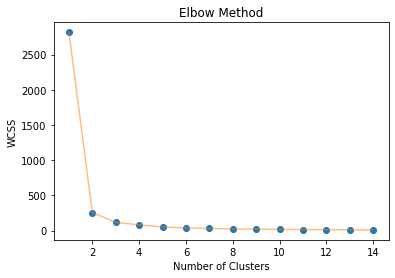

In [ ]:
# finding out the proper number of clusters
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

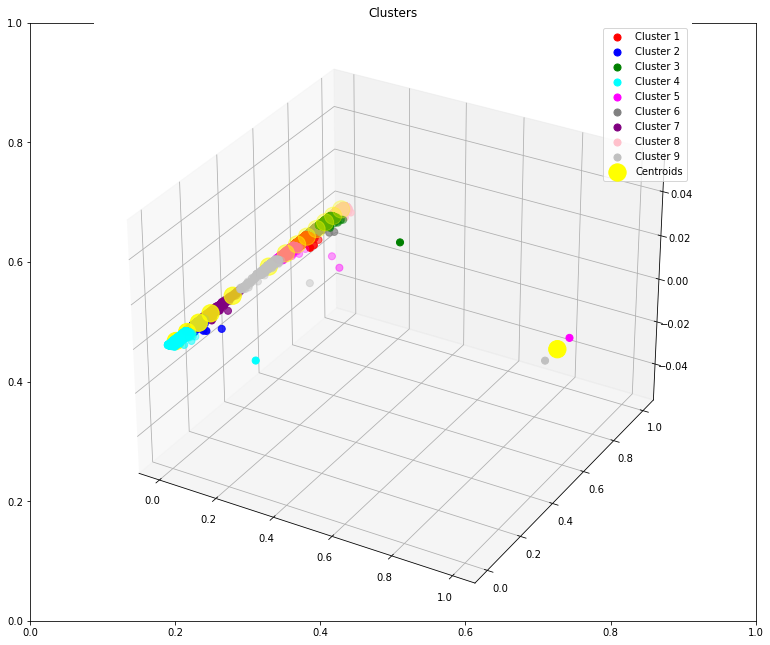

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
# predictions 
y_kmeans

# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(23597, 1)


,k_cluster
0,3
1,3
2,3
3,3
4,3


In [ ]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_tableau, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(23597, 9)


,endTime,artistName,trackName,msPlayed,TimeOfDay,UniqueID,album,track_uri,k_cluster
0,2021-03-02 01:30,Triathalon,Hard to Move,333045,90,Triathalon:Hard to Move,NaN,NaN,3
1,2021-03-02 01:32,Crumb,Cracking,111986,92,Crumb:Cracking,NaN,NaN,3
2,2021-03-02 01:36,Crumb,Nina,200280,96,Crumb:Nina,NaN,NaN,3
3,2021-03-02 01:38,Crumb,Ghostride,126120,98,Crumb:Ghostride,NaN,NaN,3
4,2021-03-02 01:41,Crumb,Fall Down,173000,101,Crumb:Fall Down,NaN,NaN,3


In [ ]:
# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

album         0.658177
track_uri     0.658177
endTime       0.000000
artistName    0.000000
trackName     0.000000
msPlayed      0.000000
TimeOfDay     0.000000
UniqueID      0.000000
k_cluster     0.000000
dtype: float64

In [ ]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).msPlayed.mean().sort_values(ascending=False)

k_cluster
4    203082.142504
3    197139.441436
2    195830.441991
1    193807.656810
5    192309.264210
8    192270.977427
7    191863.236902
6    189217.423812
0    179451.072733
Name: msPlayed, dtype: float64

In [ ]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

3    3620
1    3348
0    3231
5    3202
2    3034
7    2634
4    2021
6    1621
8     886
Name: k_cluster, dtype: int64

In [ ]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 4][:10]

,endTime,artistName,trackName,msPlayed,TimeOfDay,UniqueID,album,track_uri,k_cluster
548,2021-03-13 16:38,Teyana Taylor,Rose In Harlem,11660,998,Teyana Taylor:Rose In Harlem,K.T.S.E.,38HcgcQC4suvti0Sa0e5yc,4
549,2021-03-13 16:38,Medasin,Always Afternoon,169889,998,Medasin:Always Afternoon,Always Afternoon,6GMaQmdpwGolGyuW6ZJ9X9,4
550,2021-03-13 16:41,H.E.R.,Focus,200133,1001,H.E.R.:Focus,H.E.R.,3tZs3nVjySLbL320lP4mvs,4
551,2021-03-13 16:44,Solange,Stay Flo,175706,1004,Solange:Stay Flo,When I Get Home,6GCIYIWUBSLontW6divqsw,4
834,2021-03-19 15:20,The Mellowells,Long Johns,71036,920,The Mellowells:Long Johns,Shindy,48Ir1hGbzjeX3BVeR439cO,4
835,2021-03-19 15:47,The Mellowells,Long Johns,328016,947,The Mellowells:Long Johns,Shindy,48Ir1hGbzjeX3BVeR439cO,4
836,2021-03-19 15:47,Glow!,If It Were Me,943,947,Glow!:If It Were Me,If It Were Me,7lDPr3wYYKewaye3RHRXZx,4
837,2021-03-19 16:39,The Mellowells,Long Johns,276828,999,The Mellowells:Long Johns,Shindy,48Ir1hGbzjeX3BVeR439cO,4
838,2021-03-19 16:42,Glow!,If It Were Me,196645,1002,Glow!:If It Were Me,If It Were Me,7lDPr3wYYKewaye3RHRXZx,4
1146,2021-03-22 14:53,Mac DeMarco,Ode to Viceroy,233817,893,Mac DeMarco:Ode to Viceroy,NaN,NaN,4


In [ ]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 

msPlayed                                                          \
             count           mean            std  min        25%       50%   
k_cluster                                                                    
0           3231.0  179451.072733  109332.410696  0.0  115659.50  183746.0   
1           3348.0  193807.656810   98631.062693  0.0  142231.25  192009.0   
2           3034.0  195830.441991  165324.937814  0.0  136173.00  193087.0   
3           3620.0  197139.441436  147380.219955  0.0  142039.50  194946.0   
4           2021.0  203082.142504  584546.929116  0.0  114660.00  189906.0   
5           3202.0  192309.264210  101349.473582  0.0  141587.00  194269.0   
6           1621.0  189217.423812   91837.606075  0.0  134681.00  187163.0   
7           2634.0  191863.236902  103066.810146  0.0  138406.75  192106.0   
8            886.0  192270.977427  859897.564731  0.0   67540.00  171534.0   

                                TimeOfDay                                  \
                75%         max     count         mean        std     min   
k_cluster                                                                   
0          235369.0   1386131.0    3231.0  1064.367379  31.852898  1006.0   
1          240123.0   2177420.0    3348.0   197.701314  36.798669   136.0   
2          245240.0   6982549.0    3034.0  1275.465722  30.526120  1224.0   
3          243727.0   6832354.0    3620.0    71.028453  39.146949     0.0   
4          247949.0  25254406.0    2021.0   947.216724  37.406935   864.0   
5          243000.0   1647706.0    3202.0  1170.780762  31.533651  1118.0   
6          232733.0   1123275.0    1621.0   324.173967  56.839122   263.0   
7          243238.0   1138821.0    2634.0  1382.922551  31.688525  1330.0   
8          227600.0  25221728.0     886.0   779.462754  65.887957   554.0   

                                           
              25%     50%     75%     max  
k_cluster                                  
0          1036.0  1066.0  1091.0  1117.0  
1           166.0   197.0   230.0   262.0  
2          1249.0  1276.0  1302.0  1329.0  
3            37.0    72.5   106.0   135.0  
4           918.0   951.0   979.0  1007.0  
5          1142.0  1171.0  1199.0  1223.0  
6           282.0   308.0   348.0   552.0  
7          1355.0  1381.0  1411.0  1439.0  
8           747.0   796.0   827.0   863.0

In [ ]:
df_cluster.to_csv('df_cluster.csv', index=0)

In [ ]:
#Resources
#https://colab.research.google.com/drive/1RjxURDlUTgR-ZhIMfu47jsK2mC3KB4R3?usp=sharing#scrollTo=wjvICz500TOE
#https://colab.research.google.com/drive/1bjnEi_C9tb1YUIQ-IkqvM6IL-_DhjEzE#scrollTo=fobJde6TiWei
#Juypter Notebook which is what my code and data was written

In [ ]:
#Time Conversions to Understand them
#1064.367379 / 60 = 17.7394563 -> 5:45 pm
#197.701314 / 60 = 3.2950219 ->3:20 am
#1275.465722 / 60 = 21.257762 -> 9:15 pm
#71.028453 / 60 = 1.18380755 -> 1:10 am
#947.216724 / 60 = 15.7869454 -> 3:45 pm
#1170.780762 / 60 = 19.5130127 -> 7:30 pm
#324.173967 / 60 = 5.40289945 -> 5:20 am
#1382.922551 / 60 = 23.0487092 -> 11:00 pm
#779.462754 / 60 = 12.9910459 -> 1:00 pm
